In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
books = pd.read_csv("books_additional.csv")

In [75]:
# Number of gender __ authors per semester 
master = books.copy()

master['Male'] = [1 if g == 'male' else 0 for g in books['Gender']]
master['Female'] = [1 if g == 'female' else 0 for g in books['Gender']]

master["Weighted Male"] = master["Male"] * master["Number Students"]
master["Weighted Female"] = master["Female"] * master["Number Students"]


## DROP ROWS IF IS SUMMER, SINCE FEWER BOOKS AND STUDENTS. FEEL FREE TO COMMENT OUT.
master = master[master["Semester"].str.contains("Summer") == False]


master.head()

,Semester,Class,Class Number,Section Number,Title,Author(s),Gender,Number Students,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Male,Female,Weighted Male,Weighted Female
0,Spring 2012,Reading & Composition: American Song,English R1A,1,Souls of Black Folk,['W. E. B. Du Bois'],male,16.0,NaN,NaN,NaN,NaN,1,0,16.0,0.0
1,Spring 2012,Reading & Composition: American Song,English R1A,1,The American Songbag,['Carl Sandburg'],male,16.0,NaN,NaN,NaN,NaN,1,0,16.0,0.0
2,Spring 2012,Reading & Composition: American Song,English R1A,1,American Ballads and Folk SOngs,['Alan Lomax'],male,16.0,NaN,NaN,NaN,NaN,1,0,16.0,0.0
3,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,2,On the Principle of Population,['Thomas Robert Malthus'],male,18.0,NaN,NaN,NaN,NaN,1,0,18.0,0.0
4,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,2,The Road,['Cormac McCarthy'],male,18.0,NaN,NaN,NaN,NaN,1,0,18.0,0.0


In [76]:
gender = master.copy()
drop_cols = [c for c in genders.columns if c not in ["Semester", "Male", "Female", "Weighted Male", "Weighted Female"]]
genders.drop(drop_cols, axis=1, inplace=True)

genders = genders.groupby("Semester", sort=False).sum()
genders["Proportion"] = genders["Male"] / (genders["Male"] + genders["Female"])
genders["Weighted Proportion"] = genders["Weighted Male"] / (genders["Weighted Male"] + genders["Weighted Female"])

genders.head()

,Male,Female,Weighted Male,Weighted Female,Proportion,Weighted Proportion
Semester,,,,,,
Spring 2012,270,107,7986.0,2886.0,0.716180,0.734547
Fall 2012,244,78,8286.0,2795.0,0.757764,0.747766
Spring 2013,155,68,4871.0,2105.0,0.695067,0.698251
Fall 2013,243,82,8759.0,2959.0,0.747692,0.747483
Spring 2014,246,91,5524.0,2645.0,0.729970,0.676215


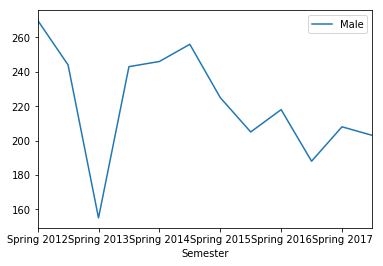

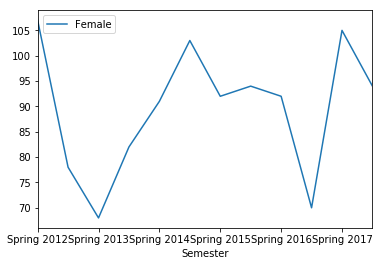

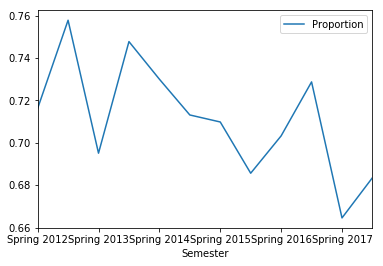

In [77]:
# MALE
male = genders.copy()
drop_list = [c for c in male.columns if c != "Semester" and c != "Male"]
male.drop(drop_list, axis=1, inplace=True)

plt.figure()
male.plot()
plt.show()

# FEMALE
female = genders.copy()
drop_list = [c for c in female.columns if c != "Semester" and c != "Female"]
female.drop(drop_list, axis=1, inplace=True)

plt.figure()
female.plot()
plt.show()

# Proportion
p = genders.copy()
drop_list = [c for c in p.columns if c != "Semester" and c != "Proportion"]
p.drop(drop_list, axis=1, inplace=True)

plt.figure()
p.plot()
plt.show()

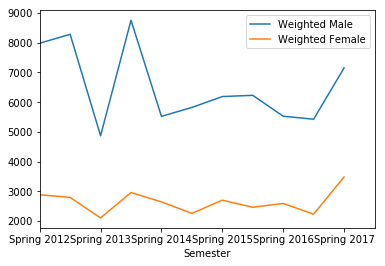

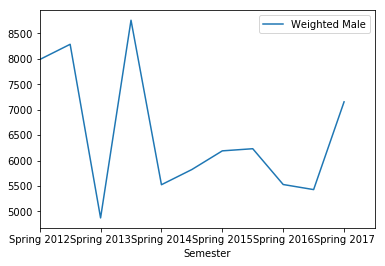

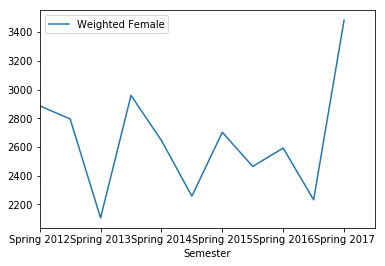

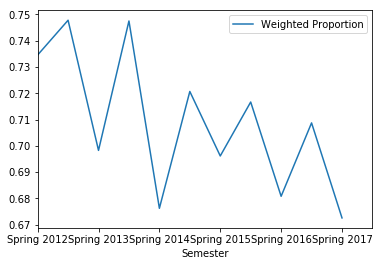

In [49]:
# WEIGHTED MALE AND FEMALE TOGETHER
weighted = genders.copy()
drop_list = [c for c in weighted.columns if c != "Semester" and c != "Weighted Male" and c != "Weighted Female"]
weighted.drop(drop_list, axis=1, inplace=True)

plt.figure()
weighted.plot()
plt.show()

# WEIGHTED MALE ONLY
wmale = genders.copy()
drop_list = [c for c in wmale.columns if c != "Semester" and c != "Weighted Male"]
wmale.drop(drop_list, axis=1, inplace=True)

plt.figure()
wmale.plot()
plt.show()

# WEIGHTED FEMALE ONLY
wfemale = genders.copy()
drop_list = [c for c in wfemale.columns if c != "Semester" and c != "Weighted Female"]
wfemale.drop(drop_list, axis=1, inplace=True)

plt.figure()
wfemale.plot()
plt.show()

# WEIGHTED PROPORTION
wp = genders.copy()
drop_list = [c for c in wp.columns if c != "Semester" and c != "Weighted Proportion"]
wp.drop(drop_list, axis=1, inplace=True)

plt.figure()
wp.plot()
plt.show()

In [100]:
# Most male-author dominated class per semester?
most_males = master.copy()
drop_cols = [c for c in most_males.columns if c not in ["Semester", "Class", "Class Number", "Male", "Female", "Weighted Male", "Weighted Female"]]
most_males.drop(drop_cols, axis=1, inplace=True)
most_males.groupby(["Semester","Class Number"], sort=False).sum()
most_males.head()
# NOT DONE YET

,Semester,Class,Class Number,Male,Female,Weighted Male,Weighted Female
0,Spring 2012,Reading & Composition: American Song,English R1A,1,0,16.0,0.0
1,Spring 2012,Reading & Composition: American Song,English R1A,1,0,16.0,0.0
2,Spring 2012,Reading & Composition: American Song,English R1A,1,0,16.0,0.0
3,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,1,0,18.0,0.0
4,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,1,0,18.0,0.0


In [1]:
# QUESTIONS FOR THE FUTURE
# Most women dominanted class per semester?
# Most common authors?
# Lower division vs upper division